Estimators
See https://nbviewer.jupyter.org/github/pablormier/prml-bishop-notebooks/blob/master/notebooks/A1.%20Biased%20and%20Unbiased%20Point%20Estimators%20-%20Sample%20mean%20and%20variance.ipynb

http://www.turingfinance.com/regression-analysis-using-python-statsmodels-and-quandl/
    

Here we are going to explain how to compute $\cos x$.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 16,10

In [3]:
def mean(x): return sum(x) / len(x)

def var(x, m=None):
    m = m or mean(x)
    return sum([(xe - m)**2 for xe in x]) / len(x)

In [4]:
import random as rnd
population_size = 500000
population = [rnd.randint(0, 100) for _ in range(population_size)]

In [5]:
population_mean = mean(population)
population_var = var(population, population_mean)
print("population mean: {:.2f}, population variance: {:.2f}".format(population_mean, population_var))

population mean: 49.97, population variance: 850.56


In [6]:
sample = rnd.sample(population, 10)
sample_mean = mean(sample)
sample_var = var(sample)
print("sample mean: {:.2f}, sample variance: {:.2f}".format(sample_mean, sample_var))

sample mean: 45.70, sample variance: 1314.21


In [7]:
sample_means, sample_vars = [], []
for _ in range(100000):
    sample = rnd.sample(population, 10)
    m = mean(sample)
    sample_means.append(m)
    sample_vars.append(var(sample, m))

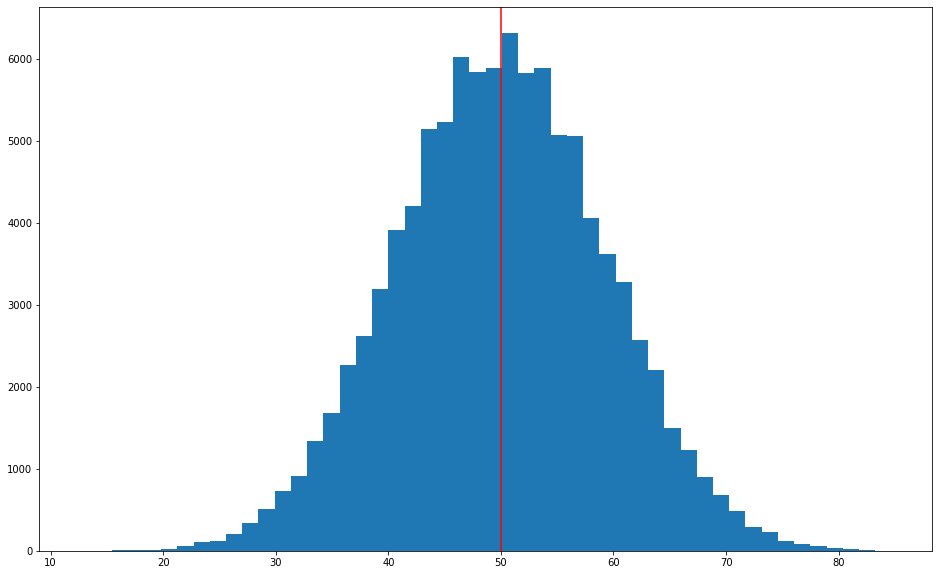

In [8]:
plt.hist(sample_means, 50)
plt.axvline(population_mean, color='red');

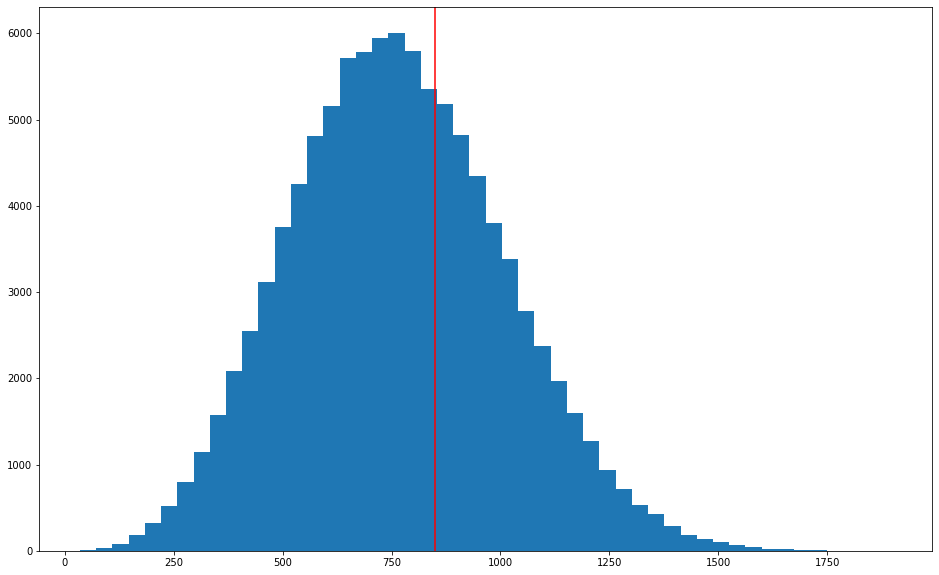

In [9]:
plt.hist(sample_vars, 50);
plt.axvline(population_var, color='red');

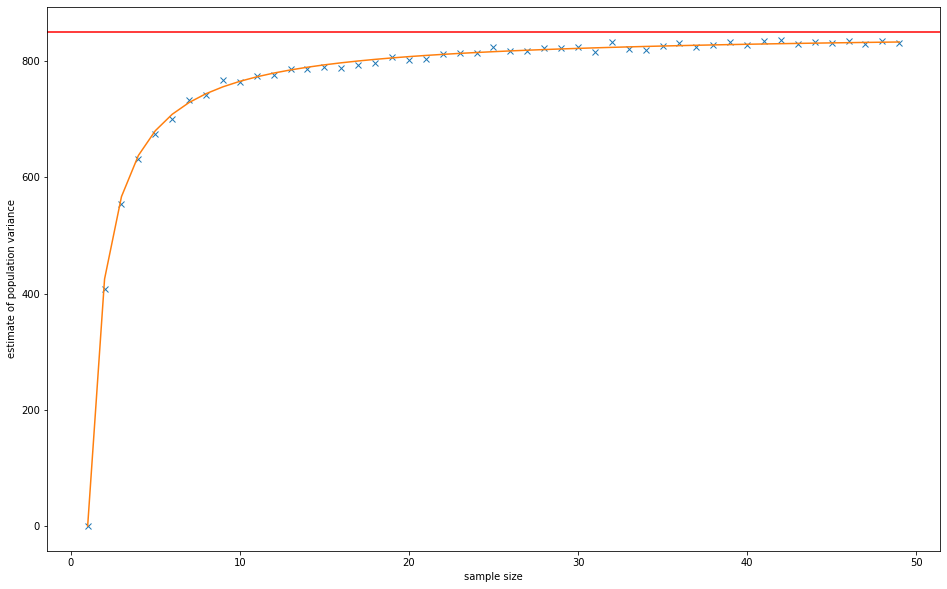

In [10]:
sample_sizes, sample_vars = [], []
for ss in range(1, 50):
    sample_sizes.append(ss)
    sample_vars.append(mean([var(rnd.sample(population, ss)) for _ in range(1000)]))
plt.plot(sample_sizes, sample_vars, 'x')
plt.axhline(population_var, color='red')
plt.plot(sample_sizes, [(n-1)/n * population_var for n in sample_sizes])
plt.xlabel('sample size')
plt.ylabel('estimate of population variance');

In [11]:
def sample_var(x, m=None):
    m = m or mean(x)
    n = len(x)
    return n/(n-1) * var(x, m)

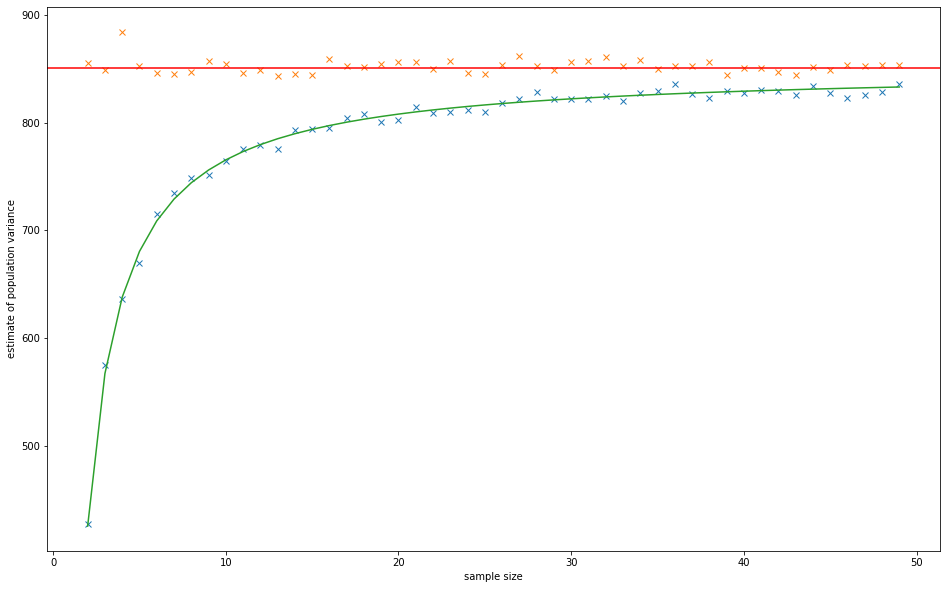

In [12]:
sample_sizes, sample_vars, sample_vars1 = [], [], []
for ss in range(2, 50):
    sample_sizes.append(ss)
    sample_vars.append(mean([var(rnd.sample(population, ss)) for _ in range(1000)]))
    sample_vars1.append(mean([sample_var(rnd.sample(population, ss)) for _ in range(1000)]))
plt.plot(sample_sizes, sample_vars, 'x')
plt.plot(sample_sizes, sample_vars1, 'x')
plt.axhline(population_var, color='red')
plt.plot(sample_sizes, [(n-1)/n * population_var for n in sample_sizes])
plt.xlabel('sample size')
plt.ylabel('estimate of population variance');

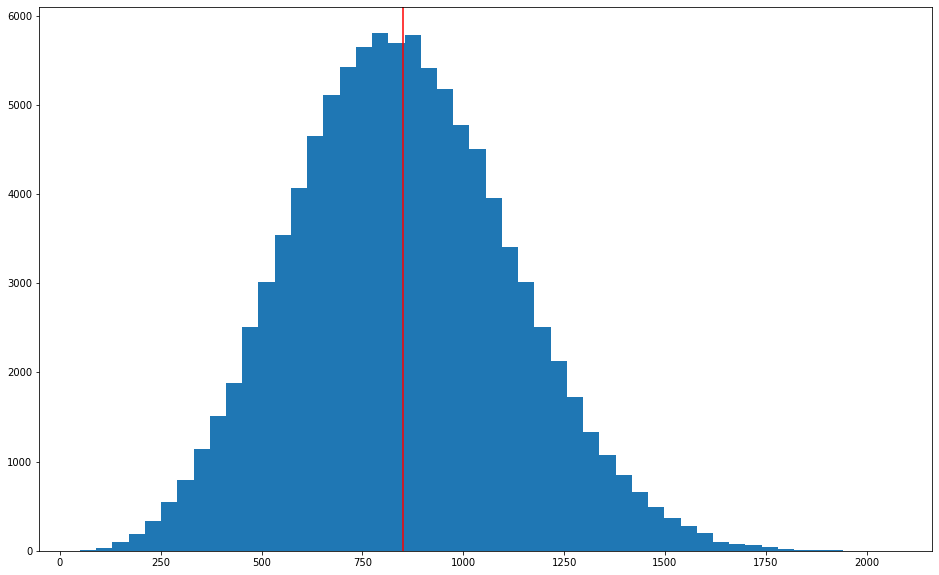

In [13]:
sample_means, sample_vars = [], []
for _ in range(100000):
    sample = rnd.sample(population, 10)
    m = mean(sample)
    sample_vars.append(sample_var(sample, m))
    
plt.hist(sample_vars, 50)
plt.axvline(population_var, color='red');

In [14]:
def mean1(x): return (sum(x) + 10.) / len(x)
def mean2(x): return x[0]

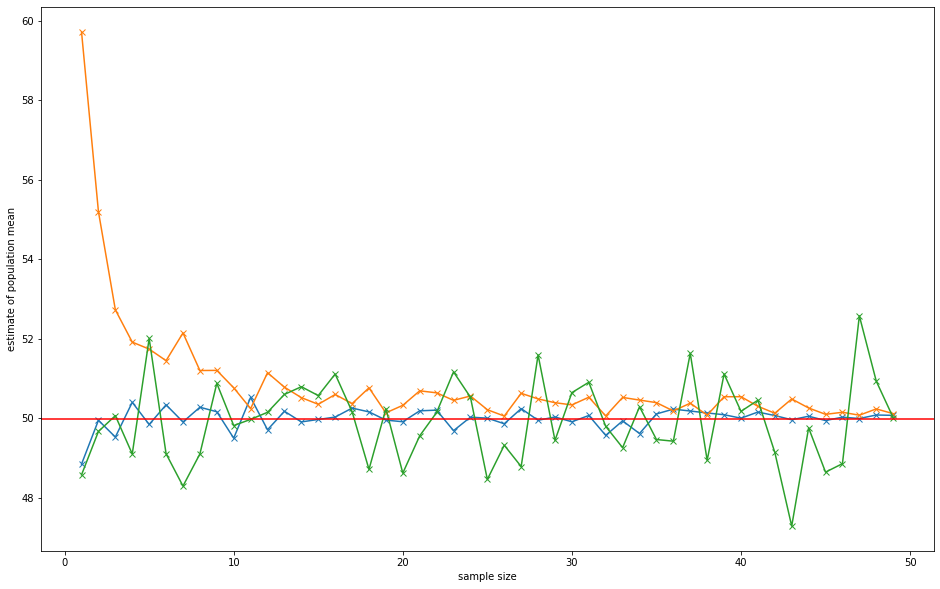

In [15]:
sample_sizes, sample_means, sample_means1, sample_means2 = [], [], [], []
for ss in range(1, 50):
    sample_sizes.append(ss)
    sample_means.append(mean([mean(rnd.sample(population, ss)) for _ in range(1000)]))
    sample_means1.append(mean([mean1(rnd.sample(population, ss)) for _ in range(1000)]))
    sample_means2.append(mean([mean2(rnd.sample(population, ss)) for _ in range(1000)]))
plt.plot(sample_sizes, sample_means, 'x-')
plt.plot(sample_sizes, sample_means1, 'x-')
plt.plot(sample_sizes, sample_means2, 'x-')
plt.axhline(population_mean, color='red')
plt.xlabel('sample size')
plt.ylabel('estimate of population mean');

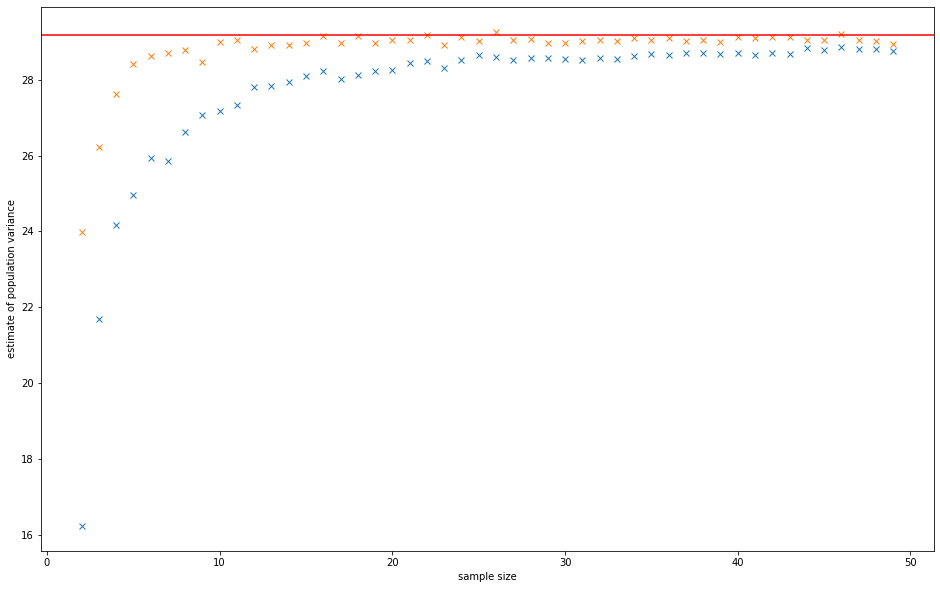

In [16]:
import math
sample_sizes, sample_sds, sample_sds1 = [], [], []
for ss in range(2, 50):
    sample_sizes.append(ss)
    sample_sds.append(mean([math.sqrt(var(rnd.sample(population, ss))) for _ in range(1000)]))
    sample_sds1.append(mean([math.sqrt(sample_var(rnd.sample(population, ss))) for _ in range(1000)]))
plt.plot(sample_sizes, sample_sds, 'x')
plt.plot(sample_sizes, sample_sds1, 'x')
plt.axhline(math.sqrt(population_var), color='red')
plt.xlabel('sample size')
plt.ylabel('estimate of population variance');

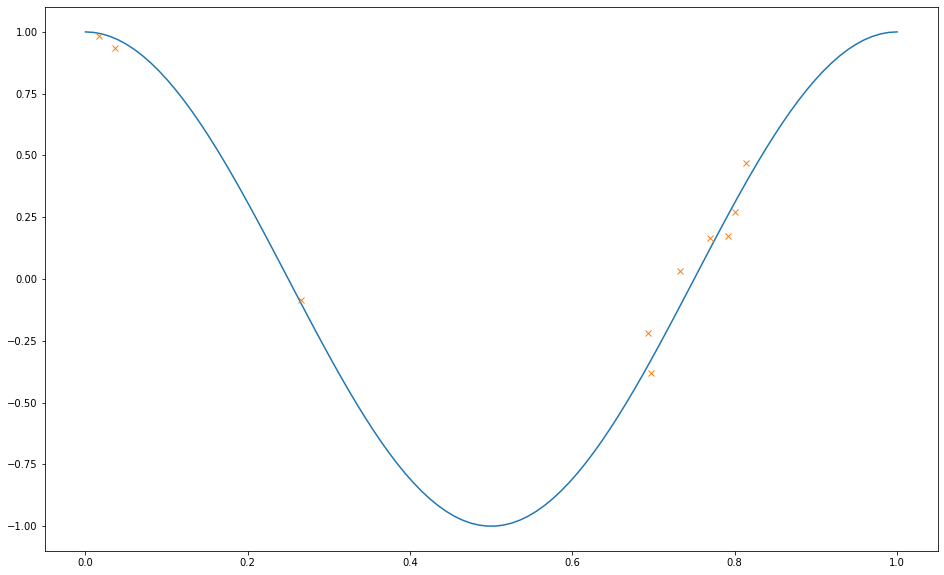

In [17]:
import numpy as np

def true_fun(x): return np.cos(2. * np.pi * x)

sample_size = 10
dense_x = np.linspace(0., 1., 100)
x = np.sort(np.random.rand(sample_size))
y = true_fun(x) + np.random.randn(sample_size) * 0.1

plt.plot(dense_x, true_fun(dense_x))
plt.plot(x, y, 'x');

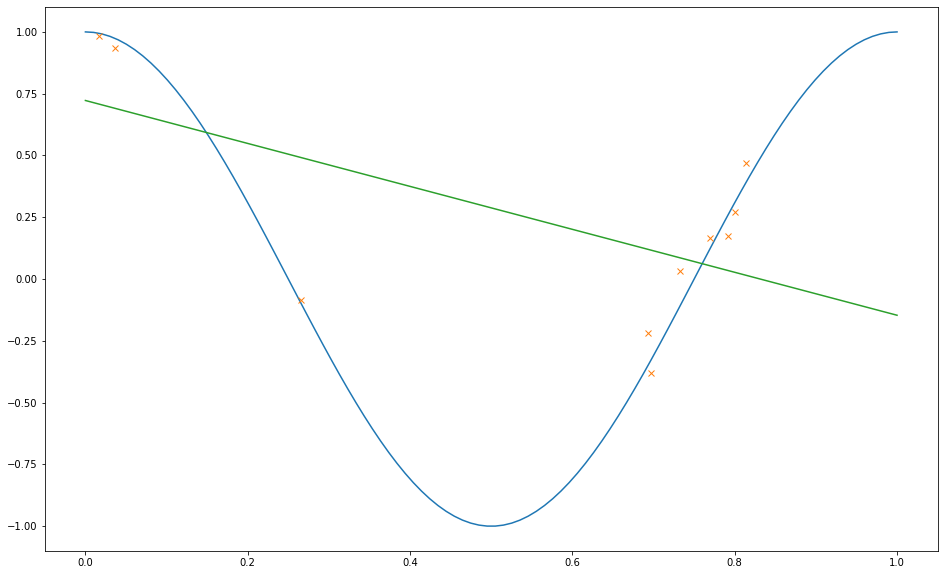

In [18]:
z = np.polyfit(x, y, 1)
plt.plot(dense_x, true_fun(dense_x))
plt.plot(x, y, 'x')
plt.plot(dense_x, np.poly1d(z)(dense_x));

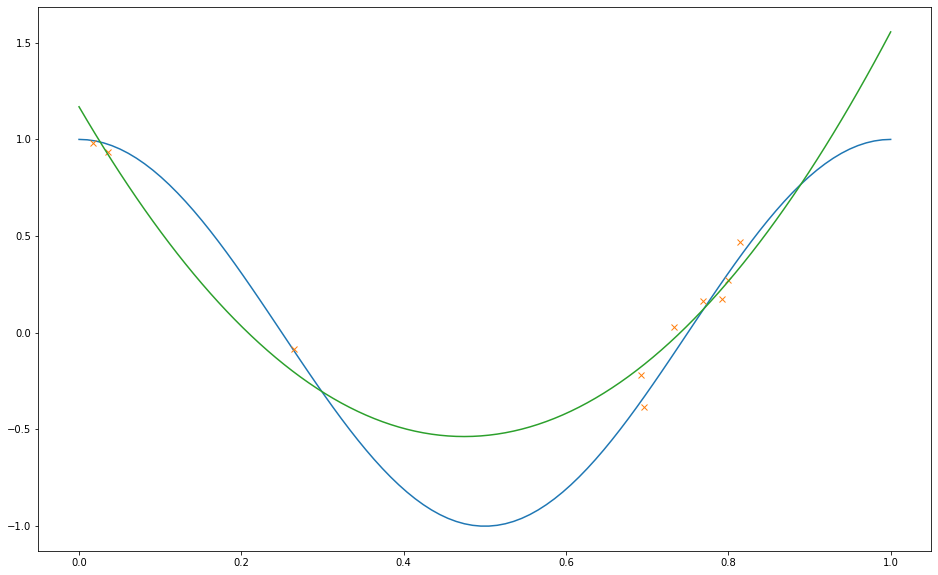

In [19]:
z = np.polyfit(x, y, 2)
plt.plot(dense_x, true_fun(dense_x))
plt.plot(x, y, 'x')
plt.plot(dense_x, np.poly1d(z)(dense_x));

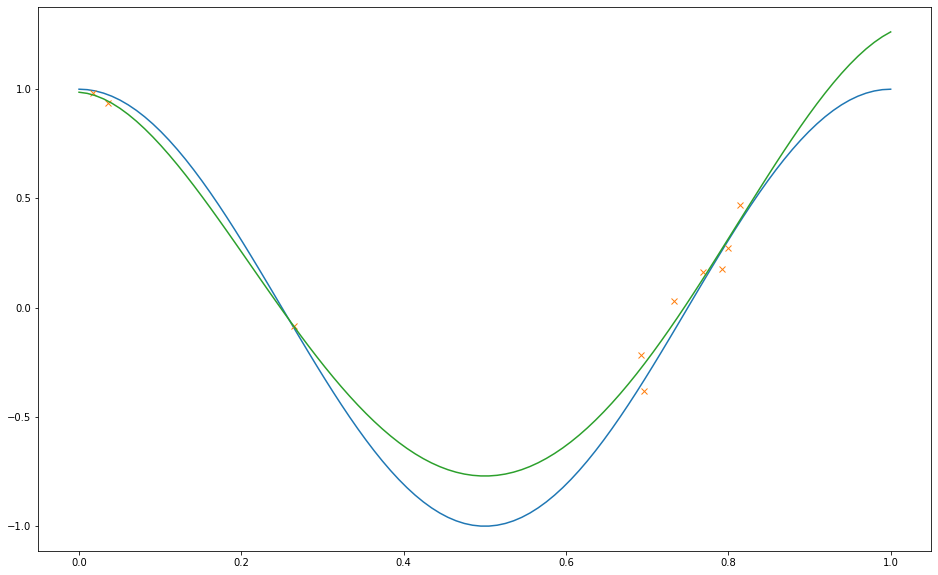

In [20]:
z = np.polyfit(x, y, 4)
plt.plot(dense_x, true_fun(dense_x))
plt.plot(x, y, 'x')
plt.plot(dense_x, np.poly1d(z)(dense_x));

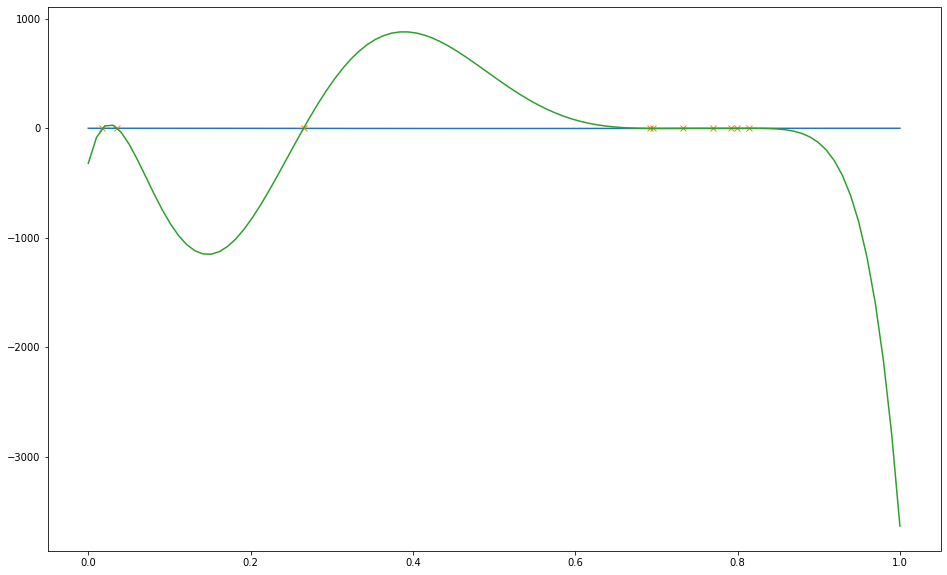

In [21]:
z = np.polyfit(x, y, 8)
plt.plot(dense_x, true_fun(dense_x))
plt.plot(x, y, 'x')
plt.plot(dense_x, np.poly1d(z)(dense_x));

We use exxeleron qPython to interface with Python:

https://github.com/exxeleron/qPython

Install it using
    
    pip install qpython
    
On Windows you may need

    http://landinghub.visualstudio.com/visual-cpp-build-tools
    
and follow the advice (for x86 or x64) from

    https://stackoverflow.com/questions/14372706/visual-studio-cant-build-due-to-rc-exe

Contract: Crude Oil West Texas Intermediate
Exchange: NYMEX
Contract size: 1,000 US barrels (42,000 gallons)
Margin/maintenance: $2,640/2,400
Tick size: 1 cent per barrel ($10.00 per contract)
Point value: $1,000
First notice date: 2016.05.24
Expiration date: 2016.05.20

V = 40 means: 40 * (point value) per 1 contract, i.e.
40 * $1,000 per 1 contract, i.e.
40 * $1,000 per 1 * 1,000 US barrels, i.e.
$40 per barrel

In [22]:
from qpython import qconnection
q = qconnection.QConnection(host='localhost', port=41822)
q.open()

ModuleNotFoundError: No module named 'qpython'

In [ ]:
df = q('select datetime: date+time, bidprice, bidsize, askprice, asksize from quotes where date=2016.04.18, sym=`CLM16', pandas=True, numpy_temporals=True)

In [ ]:
df.head(20)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(211)
ax.plot(df['datetime'], df['bidprice'])
ax.plot(df['datetime'], df['askprice'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax = fig.add_subplot(212)
ax.plot(df.index, df['bidprice']);
ax.plot(df.index, df['askprice']);

In [ ]:
df['midprice'] = .5 * (df['bidprice'] + df['askprice'])
df['dmidprice'] = df['midprice'].diff()

In [ ]:
df.head(20)

In [ ]:
df['midprice'].plot();

In [ ]:
df['dmidprice'].plot();

# Feature Engineering

In this section we define our feature set. Our first regressor is VOI (Shen, 2015)
http://eprints.maths.ox.ac.uk/1895/1/Darryl%20Shen%20%28for%20archive%29.pdf 

In [ ]:
dbidsize = df['bidsize'].diff()
dbidprice = df['bidprice'].diff()
cvbid = np.where(dbidprice > 0, df['bidsize'], 0)
cvbid = np.where(dbidprice == 0, dbidsize, cvbid)
cvbid = np.where(dbidprice < 0, 0, cvbid)
dasksize = df['asksize'].diff()
daskprice = df['askprice'].diff()
cvask = np.where(daskprice < 0, df['asksize'], 0)
cvask = np.where(daskprice == 0, dasksize, cvask)
cvask = np.where(daskprice > 0, 0, cvask)
df['voi'] = cvbid - cvask

In [ ]:
df.head(20)

In [ ]:
df.head(20)

In [ ]:
df['voi'].plot();

In [ ]:
df['dmidprice'].plot();

In [ ]:
import statsmodels.api as sm
df.dropna(inplace = True)
model = sm.OLS(df['dmidprice'], df['voi']).fit()
model.summary()

In [ ]:
plt.scatter(df.voi, df.dmidprice);

In [ ]:
df = df[df['dmidprice'] != 0]
len(df)

In [ ]:
model = sm.OLS(df['dmidprice'], df['voi']).fit()
model.summary()

In [ ]:
plt.scatter(df.voi, df.dmidprice);

Second feature will be simple order book imbalance, whereby: $I = V_b - V_a $

In [ ]:
df['I'] = df['bidsize'] - df['asksize']

In [ ]:
df.head()

In [ ]:
model = sm.OLS(df['dmidprice'], df['I']).fit()
model.summary()

In [ ]:
model = sm.OLS(df['dmidprice'], df[['I', 'voi']]).fit()
model.summary()

In [ ]:
plt.scatter(df['I'], df['dmidprice'])

# Clustering

We will now apply clustering to S&P 500 daily close data to analyse which assets tend to move together by calculating Euclidean Distance between their returns. If we treat timeseries $a$ of a single asset as an $1 * n$ vector, then its Euclidean Distance or $L^2$ norm to the other $1 * n$ timeseries vector $b$ in $\mathbb{R}^n$ is given by:

$$d(a,b)=\sqrt{(x_{1}-y_{1})^{2}+(x_{2}-y_{2})^{2}+\cdots+(x_{n}-y_{n})^{2}}.$$

We proceed to create a symmetric distance matrix $D$ were $D_{i,j} = d(x_i,x_j)$. The first cluster of $x_i$ will be formed with timeseries of $x_j$ where distance $D_{i,j}$ is minimimal. Clusters are formed in algorithmic fashion whereby, the distance from the cluster to other points is taken to be the minimal distance of any points already clustered to the unclutered points. In this clustering example we have used $L^2$ norm as distance metric and a single linkage method. 

As an exercise, review and summarise other distance metrics and linkage methods that may be used in clustering. 

In [ ]:
SP500 = pd.read_csv('data/SP500.csv', index_col='Date').dropna(axis = 1)
SP500Index = pd.read_csv('data/^GSPC.csv', index_col='Date')['Close'][:len(SP500)]
SP500moves = SP500.pct_change().dropna()
names = SP500moves.columns.values

In [ ]:
import scipy.spatial.distance as distance
sp500_distances = pd.DataFrame(index=names, columns = names)
for sym1 in names:
    for sym2 in names:
            sp500_distances[sym1][sym2] = distance.euclidean(SP500moves[sym1].values, SP500moves[sym2].values)

In [ ]:
sp500_distances.head()

# Dendrogram
Dendrogram is visual representation of clusters, whereby vertical node distances between points and clusters are the respective norms.

In [ ]:
import plotly
plotly.tools.set_credentials_file(username='ed.silantyev', api_key='qKCGLdJRYoAD4eQdISSo')
import plotly.plotly as py
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import linkage


dendro = ff.create_dendrogram(SP500moves.T.values, labels=names, 
                              linkagefun=lambda x:linkage(SP500moves.T.values, method = 'average', metric = 'euclidean'))
dendro['layout'].update({'width':800, 'height':500})
py.iplot(dendro, filename='simple_dendrogram')

In [ ]:
SP500norm = (SP500 - SP500.mean())/SP500.std()

In [ ]:
cov = SP500norm.cov()
eig_vals, eig_vecs = np.linalg.eig(cov)
eig_vals = np.real(eig_vals)
eig_vecs = np.real(eig_vecs)

In [ ]:
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.plotly as py

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,100)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,100)], 
        y=cum_var_exp,
        name='cumulative explained variance')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
PCs = np.matmul(SP500norm.values, eig_vecs)
PCs = pd.DataFrame(PCs, index=SP500norm.index)
PCs['SP500'] = (SP500Index - SP500Index.mean())/SP500Index.std()

In [ ]:
colnames = ['PC'+str(i) for i in np.arange(len(PCs.columns.values)-1)] + ['SP500']
PCs.columns = colnames
PC10 = PCs[['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','SP500']]
PC10.plot()
plt.ylabel('Normalised Values')

In [ ]:
from sklearn.decomposition import PCA

pca  = PCA(n_components=5)
pca_vals = pca.fit_transform(SP500norm)

In [ ]:
pca_df = pd.DataFrame(pca_vals, index = PCs.index)
pca_df.columns = ['PC'+str(i) for i in np.arange(len(pca_df.columns.values))]
pca_df['SP500'] = PCs['SP500']

In [ ]:
pca_df.head()

In [ ]:
pca_reg = sm.OLS(pca_df['SP500'], pca_df['PC0']).fit()
pca_reg.resid.describe()

In [ ]:
PC10.head()

In [ ]:
pca_df_old = pca_df.copy()
pca_df['SP500'] = -10. * pca_df_old['SP500']
pca_df.plot()

In [ ]:
pca_df.describe()

https://stackoverflow.com/questions/21115669/scikit-learn-pca-matrix-transformation-produces-pc-estimates-with-flipped-signs

In [ ]:
SP500norm['SP500'] = pca_df['SP500']
pca_df['SP500'] = pca_df['SP500'].shift(-1)
SP500norm['SP500'] = SP500norm['SP500'].shift(-1)
pca_df.dropna(inplace=True)
SP500norm.dropna(inplace=True)
pca_reg = sm.OLS(pca_df['SP500'], pca_df.drop(['SP500'], axis = 1)).fit()
non_pca_reg = sm.OLS(pca_df['SP500'], SP500norm.drop(['SP500'], axis = 1)).fit()

In [ ]:
pca_reg.summary()